So far, we only used TensorFlows high level api. This is pretty much all you need for most everything, but if we want great control, we can work with lower level python api. That is the topic of this chapter. 


# A quick tour of tensorflow
- similar to numpy --but has gpu support
- supports distrubted computing 
- incudes JIT compiler--let yous optimize computations for speed and memory
- computational graph can be exported so you can train tensorflow model in one evironment then run it in another. 

this book only covers some fo the packages and functions of the tensorflow api, so you should really take some time to browse thru the api. 

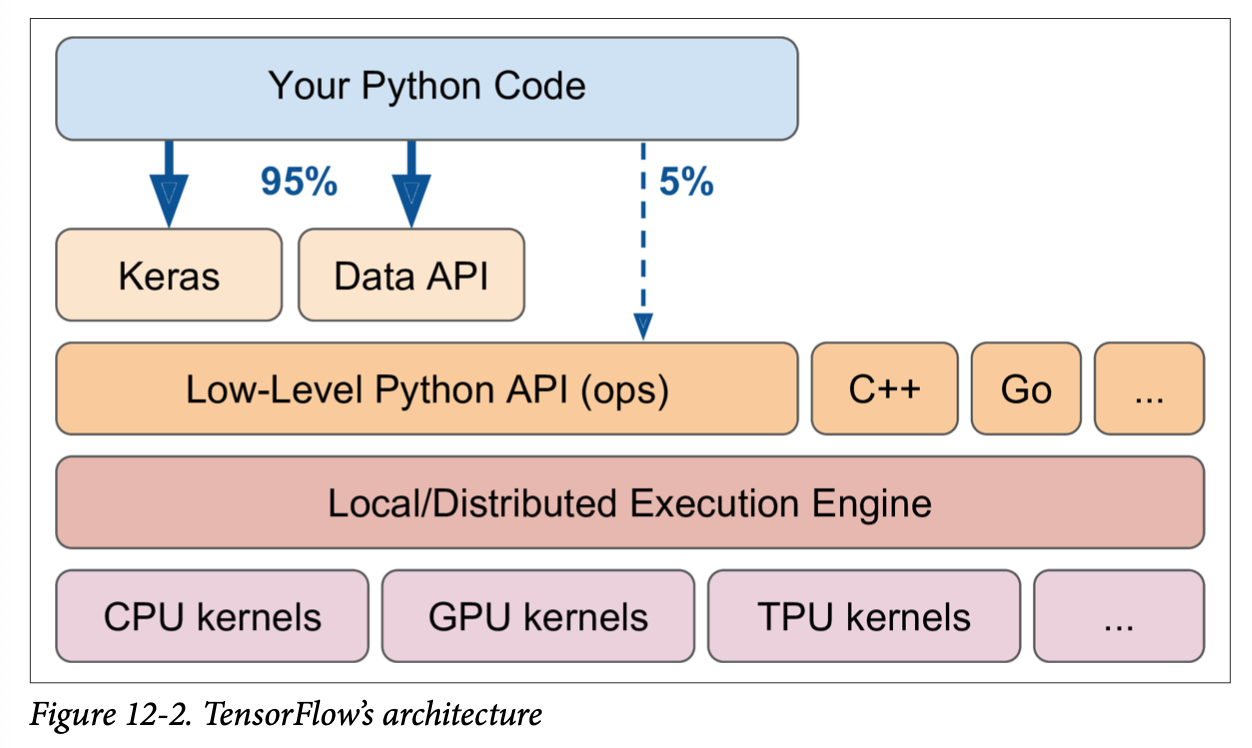

for the most part, you will be working with high lvl python code, but if you need more flexiblity, you can go in and chage the low-level python api. 

--a cool thing is that you can run tensorflow models directly in your browser. 

## Tensors and Operations


In [14]:
# let's make a tensor using tf.constant()
# here is a tensor rep a matrix w/ two rows and three columns

import tensorflow as tf
import numpy as np
tf.constant([[1., 2., 3.], [4., 5., 6.]]) # matrix

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
tf.constant(42) #scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

Just like an ndarray, a tf.Tensor has a shape and data type (dtype):

In [4]:
t = tf.constant([[1.,2.,3.],[4.,5.,6.]])

In [5]:
t.shape

TensorShape([2, 3])

indexing works like in numpy:

In [6]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[...,1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
t - 20

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-19., -18., -17.],
       [-16., -15., -14.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

you will find all basic math operators --actually more than you can find on numpy. 

## Tensor and Numpy

you'll notice that tensors play nice with NumPy -- you can create tensor from a numpy array and vv. 

In [16]:
a = np.array ([2., 4., 5.])


In [17]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [19]:
t.numpy() 

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [20]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [21]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

Type conversions can be sigificantly hurt performance --therefore, tensorflow doesn't perform any type conversions automatically.

So, you want to be good at using the cast function when you need to do a conversion:

In [25]:
t2 = tf.constant(40., dtype = tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

# Customizing Models and Training Algos

Let's start w/ a custom loss fucntion --simple and common use case

## Custom Loss Functions

In [29]:
# loss function to clean up noise in regression data

def huber_fn(y_true, y_pred):
    error = y_true = y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.abs(error) / 2 
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linaer_loss)

In [30]:
model.compile(loss = huber_fn, optimizer = "namdam")
model.fit(X_train, y_train, [...])

NameError: name 'model' is not defined

That's it! For every batch in training, the Keras calls huber_fn() function to comopute the loss, and uses it to perform a gradient descent step. 

It will also keep track of the total loss since the first epoch and display the mean loss. 

But what happens to the custom loss whne we save the model. 

## Saving and loading models that contain custom components

